In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
MAIN_PATH = "../data"

In [2]:
venue_areas = ['impactful', 'average', 'ai', 'information', 'mining', 'hci', 'linguistic', 'vision']

In [3]:
corpus = (
    pl.read_parquet(f'{MAIN_PATH}/corpus-240306.parquet')
    .filter(~pl.col('title').str.contains('(survey|benchmark|review|tutorial)'))
    .with_columns(
        pl.col('venue_area').alias('topic')
    )
)

## Table 2

In [ ]:
print(
    corpus
    .group_by('topic')
    .agg(
        pl.col('year_min_innovation').is_not_null().sum(),
        pl.col('year_min_development').is_not_null().sum(),
        pl.col('corpusid').count().alias('number_of_papers'),
        pl.col('citationcount').sum()
    )
    .join(
        corpus
        .filter(pl.col('year_min_innovation').is_not_null().alias('is_patent_cited'))
        .group_by('topic')
        .agg(pl.col('citationcount').sum().alias('number_of_academic_citations_of_patent_cited')),
        on='topic',
        how='left',
        validate='1:1',
    )
    .join(
        corpus
        .filter(pl.col('year_min_development').is_not_null().alias('is_repository_cited'))
        .group_by('topic')
        .agg(pl.col('citationcount').sum().alias('number_of_academic_citations_of_repository_cited')),
        on='topic',
        how='left',
        validate='1:1',
    )
    .sort(pl.col('number_of_papers'), descending=True)
    .select(
        pl.col('topic').alias('Topic'),
        pl.concat_str(
            pl.col('year_min_innovation').map_elements(lambda x: f'{x:,.0f}'),
            pl.format(" ({}%)", pl.col('year_min_innovation').truediv(pl.col('number_of_papers')).mul(100).round(1)),
        ).alias('Papers going into patents'),
        pl.concat_str(
            pl.col('year_min_development').map_elements(lambda x: f'{x:,.0f}'),
            pl.format(" ({}%)", pl.col('year_min_development').truediv(pl.col('number_of_papers')).mul(100).round(1)),
        ).alias('Papers going into repositories'),
        pl.col('number_of_papers').map_elements(lambda x: f'{x:,.0f}').alias('Papers'),
        pl.concat_str(
            pl.col('number_of_academic_citations_of_patent_cited').map_elements(lambda x: f'{x:,.0f}'),
            pl.format(" ({}%)", pl.col('number_of_academic_citations_of_patent_cited').truediv(pl.col('citationcount')).mul(100).round(1)),
        ).alias('Number of academic citations of papers going into patents'),
        pl.concat_str(
            pl.col('number_of_academic_citations_of_repository_cited').map_elements(lambda x: f'{x:,.0f}'),
            pl.format(" ({}%)", pl.col('number_of_academic_citations_of_repository_cited').truediv(pl.col('citationcount')).mul(100).round(1)),
        ).alias('Number of academic citations of papers going into repositories'),
        pl.col('citationcount').map_elements(lambda x: f'{x:,.0f}').alias('Number of academic citations'),
    )
    .to_pandas()
    .set_index('Topic')
    .loc[venue_areas]
    .style
    .to_latex()
)

\begin{tabular}{lllllll}
 & Papers going into patents & Papers going into repositories & Papers & Number of academic citations of papers going into patents & Number of academic citations of papers going into repositories & Number of academic citations \\
Topic &  &  &  &  &  &  \\
impactful & 32,550 (5.5%) & 244 (0.0%) & 586,864 & 18,343,830 (31.6%) & 141,183 (0.2%) & 58,141,570 \\
average & 4,806 (8.0%) & 408 (0.7%) & 60,232 & 734,263 (32.3%) & 13,062 (0.6%) & 2,270,612 \\
ai & 6,254 (5.9%) & 13,237 (12.5%) & 105,762 & 2,852,156 (42.8%) & 2,368,236 (35.5%) & 6,667,624 \\
information & 5,838 (12.4%) & 1,831 (3.9%) & 47,113 & 1,138,226 (44.2%) & 110,701 (4.3%) & 2,576,666 \\
mining & 2,666 (9.1%) & 1,770 (6.0%) & 29,369 & 631,109 (44.8%) & 148,549 (10.6%) & 1,407,968 \\
hci & 1,698 (6.4%) & 136 (0.5%) & 26,733 & 254,767 (22.3%) & 5,066 (0.4%) & 1,141,780 \\
linguistic & 3,494 (8.9%) & 7,394 (18.7%) & 39,475 & 883,689 (46.3%) & 617,508 (32.4%) & 1,908,013 \\
vision & 8,742 (15.1%) & 9,79

In [ ]:
(
    corpus
    .with_columns(pl.col('year_min_innovation').is_not_null().alias('is_patent_cited'))
    .group_by('topic')
    .agg(
        pl.col('year_min_innovation').is_not_null().sum(),
        pl.col('year_min_development').is_not_null().sum(),
        pl.col('corpusid').count().alias('number_of_papers'),
        pl.col('citationcount').sum()
    )
    .join(
        corpus
        .filter(pl.col('year_min_innovation').is_not_null().alias('is_patent_cited'))
        .group_by('topic')
        .agg(pl.col('citationcount').sum().alias('number_of_academic_citations_of_patent_cited')),
        on='topic',
        how='left',
        validate='1:1',
    )
    .join(
        corpus
        .filter(pl.col('year_min_development').is_not_null().alias('is_repository_cited'))
        .group_by('topic')
        .agg(pl.col('citationcount').sum().alias('number_of_academic_citations_of_repository_cited')),
        on='topic',
        how='left',
        validate='1:1',
    )
    .select(
        pl.col('topic').alias('Topic'),
        pl.concat_str(
            pl.col('year_min_innovation'),
            pl.format(" ({}%)", pl.col('year_min_innovation').truediv(pl.col('number_of_papers')).mul(100).round(1)),
        ).alias('Papers going into patents'),
        pl.concat_str(
            pl.col('year_min_development'),
            pl.format(" ({}%)", pl.col('year_min_development').truediv(pl.col('number_of_papers')).mul(100).round(1)),
        ).alias('Papers going into repositories'),
        pl.col('number_of_papers').alias('Papers'),
        pl.concat_str(
            pl.col('number_of_academic_citations_of_patent_cited'),
            pl.format(" ({}%)", pl.col('number_of_academic_citations_of_patent_cited').truediv(pl.col('citationcount')).mul(100).round(1)),
        ).alias('Number of academic citations of papers going into patents'),
        pl.concat_str(
            pl.col('number_of_academic_citations_of_repository_cited'),
            pl.format(" ({}%)", pl.col('number_of_academic_citations_of_repository_cited').truediv(pl.col('citationcount')).mul(100).round(1)),
        ).alias('Number of academic citations of papers going into repositories'),
        pl.col('citationcount').alias('Number of academic citations'),
    )
    .sort('Papers', descending=True)
    .to_pandas()
    .set_index('Topic')
)

,Papers going into patents,Papers going into repositories,Papers,Number of academic citations of papers going into patents,Number of academic citations of papers going into repositories,Number of academic citations
Topic,,,,,,
impactful,32550 (5.5%),244 (0.0%),586864,18343830.0 (31.6%),141183.0 (0.2%),58141570.0
ai,6254 (5.9%),13237 (12.5%),105762,2852156.0 (42.8%),2368236.0 (35.5%),6667624.0
average,4806 (8.0%),408 (0.7%),60232,734263.0 (32.3%),13062.0 (0.6%),2270612.0
vision,8742 (15.1%),9795 (16.9%),57864,3769944.0 (59.8%),1924702.0 (30.6%),6299765.0
information,5838 (12.4%),1831 (3.9%),47113,1138226.0 (44.2%),110701.0 (4.3%),2576666.0
linguistic,3494 (8.9%),7394 (18.7%),39475,883689.0 (46.3%),617508.0 (32.4%),1908013.0
mining,2666 (9.1%),1770 (6.0%),29369,631109.0 (44.8%),148549.0 (10.6%),1407968.0
hci,1698 (6.4%),136 (0.5%),26733,254767.0 (22.3%),5066.0 (0.4%),1141780.0


In [6]:
df = corpus.to_pandas()
df["venue_area"] = df["topic"]
df["is_innovation_success"] = df["year_min_innovation"].notnull()
df["is_development_success"] = df["year_min_development"].notnull()
df["is_both_success"] = df["is_innovation_success"] & df["is_development_success"]
df["log_academic_success"] = df["citationcount"].apply(lambda x: np.log10(x+1))

## Figure 1

/tmp/ipykernel_2156116/2357169.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "innovation": df.groupby('venue_area').apply(compute_ttest_innovation),
/tmp/ipykernel_2156116/2357169.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  "development": df.groupby('venue_area').apply(compute_ttest_development)


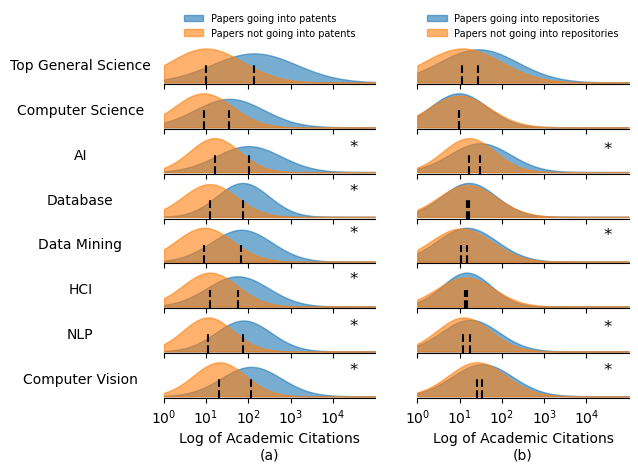

In [ ]:
from matplotlib.ticker import FuncFormatter
from scipy.stats import norm, ttest_ind

def plot_distributions(ax, x, venue, means_true, stds_true, means_false, stds_false, dimension, ylabel=True):
    y1 = norm(means_true[venue], stds_true[venue]).pdf(x)
    y2 = norm(means_false[venue], stds_false[venue]).pdf(x)
    
    ax.fill_between(x, y1, color='C0', alpha=0.6, label=f"Papers going into {dimension}")
    ax.fill_between(x, y2, color='C1', alpha=0.6, label=f'Papers not going into {dimension}')
    
    ax.axvline(means_true[venue], color='black', linestyle='--', ymin=0.0, ymax=1/2)
    ax.axvline(means_false[venue], color='black', linestyle='--', ymin=0.0, ymax=1/2)
    
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlim(mintick, maxtick)
    
    if i != len(venue_areas) - 1:
        ax.set_xticks([])
    else:
        ax.set_xticks(np.arange(mintick, maxtick, 1))
        def format_func(value, tick_number):
            return "$10^{{{:.0f}}}$".format(value)
        
        ax.xaxis.set_major_formatter(FuncFormatter(format_func))
        
# Fetch seaborn colors
mintick, maxtick = (0, 5)
x = np.linspace(mintick, maxtick, 1000)

# Pre-calculate means and std_devs
means = {
    "innovation_true": df[df["is_innovation_success"]].groupby("venue_area")["log_academic_success"].mean(),
    "innovation_false": df[~df["is_innovation_success"]].groupby("venue_area")["log_academic_success"].mean(),
    "development_true": df[df["is_development_success"]].groupby("venue_area")["log_academic_success"].mean(),
    "development_false": df[~df["is_development_success"]].groupby("venue_area")["log_academic_success"].mean(),
}

stds = {
    "innovation_true": df[df["is_innovation_success"]].groupby("venue_area")["log_academic_success"].std(),
    "innovation_false": df[~df["is_innovation_success"]].groupby("venue_area")["log_academic_success"].std(),
    "development_true": df[df["is_development_success"]].groupby("venue_area")["log_academic_success"].std(),
    "development_false": df[~df["is_development_success"]].groupby("venue_area")["log_academic_success"].std(),
}

# Pre-calculate p-valeus
compute_ttest_development = lambda group: compute_ttest(group, 'development')
compute_ttest_innovation = lambda group: compute_ttest(group, 'innovation')

def compute_ttest(group, dimension):
    # Filter groups based on innovation_success
    innovation_true_data = group[group[f"is_{dimension}_success"]]["log_academic_success"]
    innovation_false_data = group[~group[f"is_{dimension}_success"]]["log_academic_success"]
    
    # Perform t-test
    _t_stat, p_value = ttest_ind(innovation_true_data, innovation_false_data, equal_var=True, nan_policy='omit')
    
    return pd.Series({'p-value': p_value})

# Group by venue_area and compute t-test
p_values = {
    "innovation": df.groupby('venue_area').apply(compute_ttest_innovation),
    "development": df.groupby('venue_area').apply(compute_ttest_development)
}

fig, axs = plt.subplots(len(venue_areas), 2, figsize=(6, .57 * len(venue_areas)), sharex=True)

# Loop for is_innovation_success plots
venue_map = {
    'impactful': 'Top General Science',
    'average': 'Computer Science',
    'ai': 'AI',
    'hci': 'HCI',
    'linguistic': 'NLP',
    'information': 'Database',
    'mining': 'Data Mining',
    'vision': 'Computer Vision',
}

for i, ax in enumerate(axs[:, 0]):
    venue = venue_areas[i]
    try:
        plot_distributions(ax, x, venue, means["innovation_true"], stds["innovation_true"], 
                        means["innovation_false"], stds["innovation_false"], "patents")
        if i == 0:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 2), borderaxespad=0., fontsize=7, frameon=False)
        if venue not in ('impactful', 'average') and p_values['innovation'].loc[venue].item()<.001:
            ax.text(4.5, .5, '*', fontsize=12, ha='center', va='center', color='black')
        ax.set_ylabel(venue_map[venue], rotation=0, labelpad=60, verticalalignment='center')
    except:
        y2 = norm(means['innovation_false'][venue], stds['innovation_false'][venue]).pdf(x)
        ax.fill_between(x, y2, color='C1', alpha=0.6, label=f'Papers not going into patents')
        ax.axvline(means['innovation_false'][venue], color='black', linestyle='--', ymin=0.0, ymax=1/2)

        ax.text(4.5, .5, '$\ddag$', fontsize=12, ha='center', va='center', color='black')
        ax.set_yticks([])
        ax.set_ylabel(venue_map[venue], rotation=0, labelpad=110, verticalalignment='center')
        sns.despine(bottom=True, left=True)
ax.set_xlabel("Log of Academic Citations\n(a)")
        
# Loop for is_development_success plots
for i, ax in enumerate(axs[:, 1]):
    venue = venue_areas[i]
    try:
        plot_distributions(ax, x, venue, means["development_true"], stds["development_true"], 
                        means["development_false"], stds["development_false"], "repositories")
        if i == 0:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 2), borderaxespad=0., fontsize=7, frameon=False)
        if venue not in ('impactful', 'average') and p_values['development'].loc[venue].item()<.001:
            ax.text(4.5, .45, '*', fontsize=12, ha='center', va='center', color='black')
    except:
        y2 = norm(means['development_false'][venue], stds['development_false'][venue]).pdf(x)
        ax.fill_between(x, y2, color='C1', alpha=0.6, label=f'Papers not going into repositories')
        ax.axvline(means['development_false'][venue], color='black', linestyle='--', ymin=0.0, ymax=1/2)

        ax.text(4.5, .45, '$\ddag$', fontsize=12, ha='center', va='center', color='black')
        ax.set_yticks([])
        sns.despine(bottom=True, left=True)
ax.set_xlabel("Log of Academic Citations\n(b)")
plt.savefig('../figures/academic-citations.pdf', bbox_inches='tight')